In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore') 
sns.set()

In [2]:
data=pd.read_csv('SampleSuperstore.csv')
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


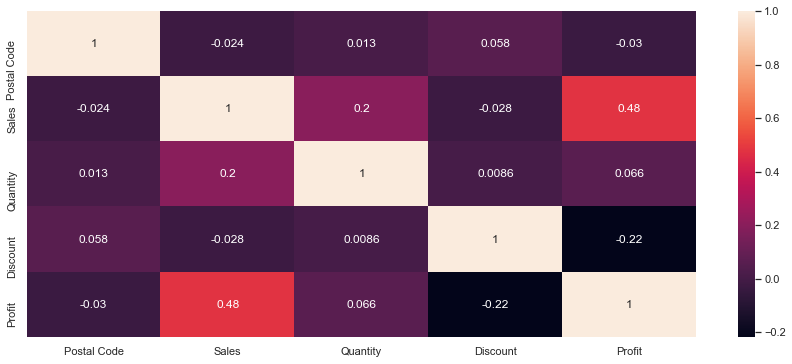

In [6]:
plt.figure(figsize= (15,6))
sns.set_style("darkgrid")
sns.heatmap(data.corr(),annot= True)
plt.show()

### Summary
1. correlation between discount and quantity
2. Quantity and Profit

In [7]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [8]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [9]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

<AxesSubplot:xlabel='Sales'>

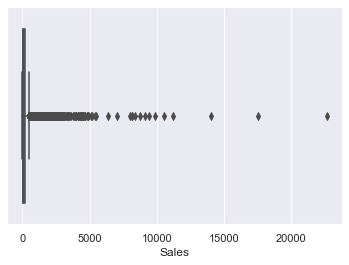

In [10]:
sns.boxplot(data['Sales'])

## Univariate Analysis

In [11]:
def box_plot(df=data):
    num_data = df.select_dtypes(include='number')
    num_cols_per_row = 5
    num_rows = int(np.ceil(len(num_data.columns)/num_cols_per_row))
    fig_num = 0
    plt.figure(figsize=(10,10))
    for col in num_data:
        fig_num += 1
        plt.subplot(num_rows, num_cols_per_row, fig_num)
        num_data[col].plot.box()
    plt.show()

In [12]:
cpdata=data.copy()

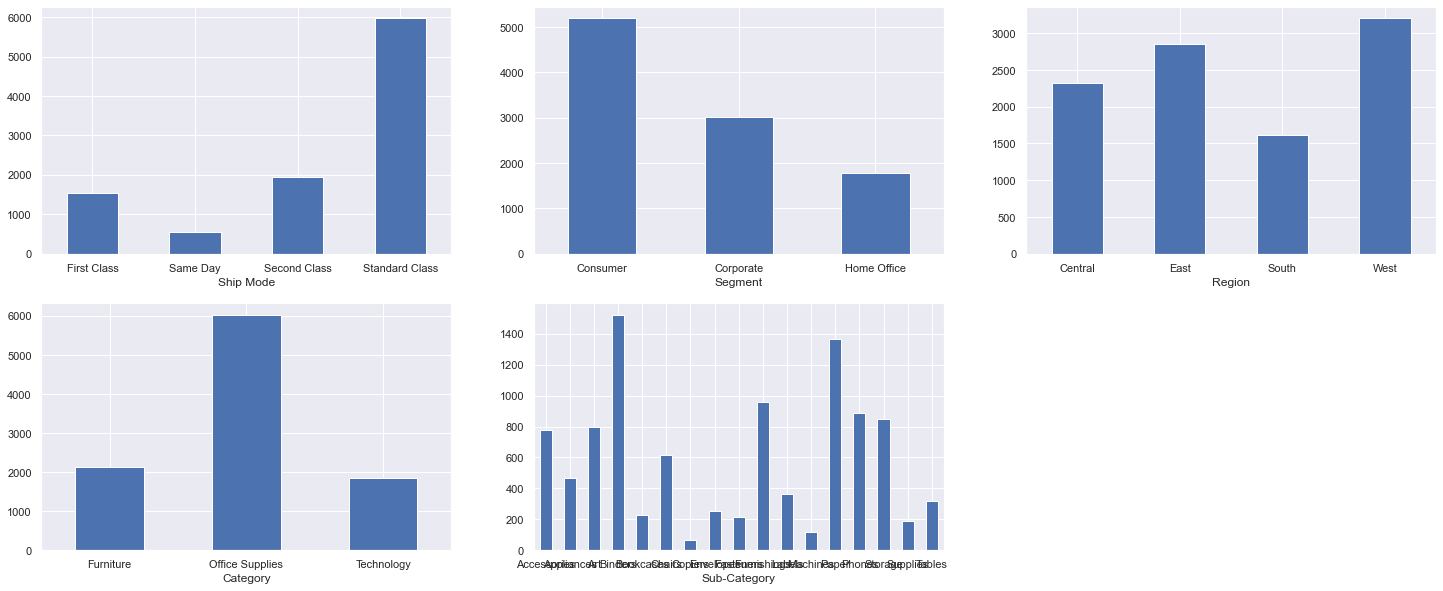

In [13]:
cols_to_drop=['Country','City','State']
cpdata=cpdata.drop(cpdata[cols_to_drop],axis=1)
cat_cols =cpdata.select_dtypes(include=['object']).columns
num_cols_per_row = 3
num_rows = int(np.ceil(len(cat_cols)/num_cols_per_row))
fig_num = 0
plt.figure(figsize=(25,10))
for col in cat_cols:
    fig_num += 1
    plt.subplot(num_rows, num_cols_per_row, fig_num)
    data[col].value_counts().sort_index().plot.bar()
    plt.xlabel(col)
    plt.xticks(rotation=0)
plt.show()

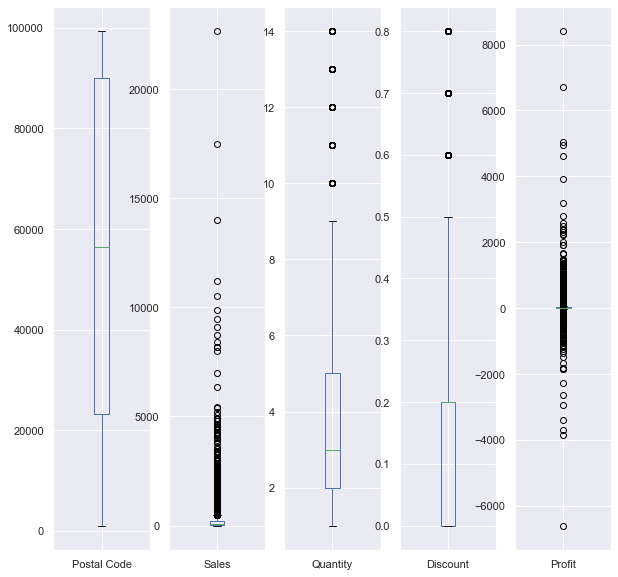

In [14]:
box_plot(data)

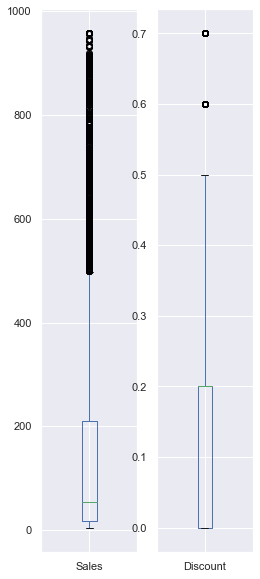

In [15]:
lower_prcntle=5
upper_prcntle=100-lower_prcntle
num_data = data.select_dtypes(include='number')
num_data.drop(['Postal Code', 'Quantity','Profit'], axis=1, inplace=True)
treat_outliers = num_data.columns
def outliers(low, high, val):
    if val < low:
        return low
    elif val > high:
        return high
    else:
        return val

for num_col in treat_outliers:
    lower_prnctle_val = num_data[num_col].quantile(lower_prcntle/100)
    upper_prcntle_val = num_data[num_col].quantile(upper_prcntle/100)
    num_data[num_col] = num_data.apply(
        lambda row: outliers(lower_prnctle_val, upper_prcntle_val, row[num_col]),
        axis=1
    )
data[num_data.columns] = num_data
box_plot(num_data)

## Bivariate

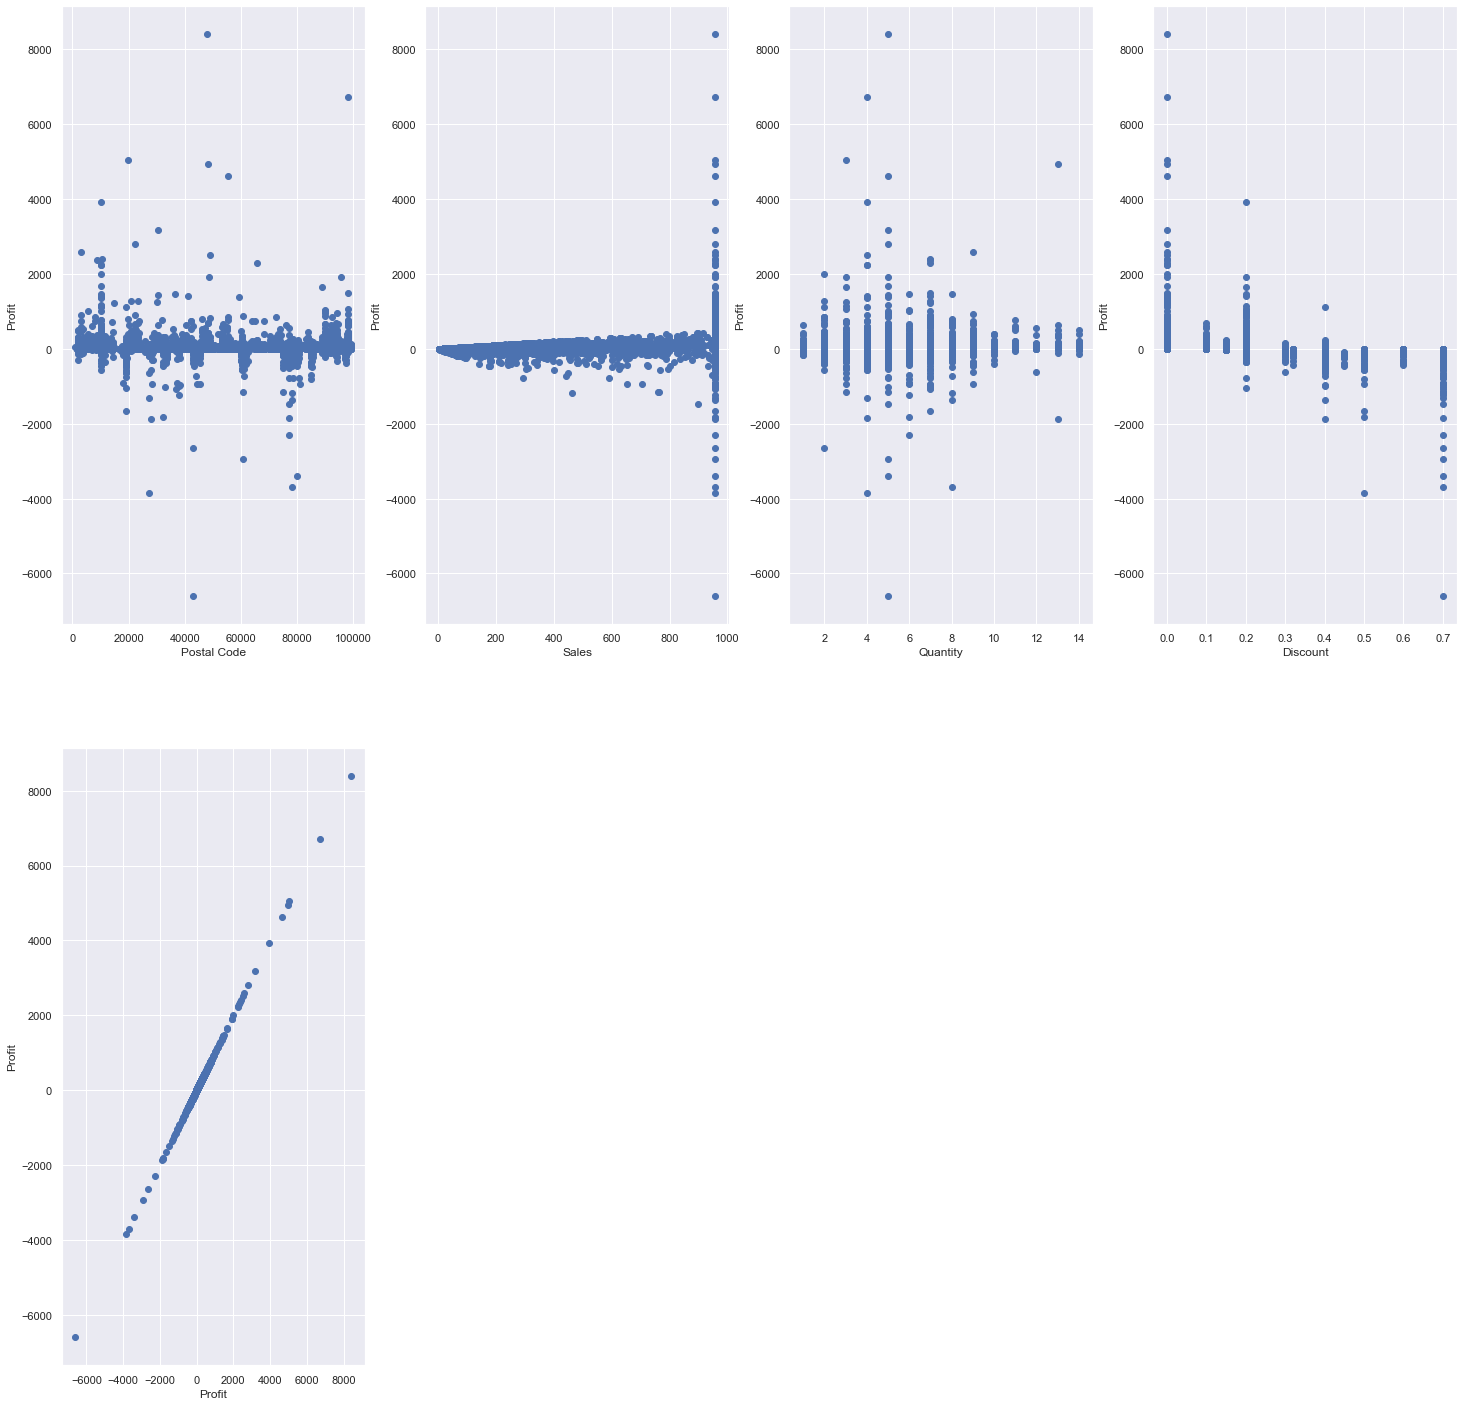

In [16]:
num_data = data.select_dtypes(include='number')
num_cols_per_row = 4
num_rows = int(np.ceil(len(num_data.columns)/num_cols_per_row))
fig_num = 0

plt.figure(figsize=(25,25))
for col in num_data:
    fig_num += 1
    plt.subplot(num_rows, num_cols_per_row, fig_num)
    plt.scatter(num_data[col], num_data['Profit'])
    plt.xlabel(col)
    plt.ylabel('Profit')
plt.show()

# Observation